### Goal: 

Warngle WeRateDogs twitter data to create intersting and trustworthy analyses and visualizations. We are going to use twitter archive data plus to gathering more additional data from url and twiter api, then assessing and cleaning data to get worthy analysis and visualizations. 

In [1]:
#import needed libraries 
import pandas as pd
import requests
import numpy as np
import os.path
import json
import tweepy 
import re
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import datetime

Initialize needed variables 

In [2]:
#Image prediction variables will be used in Step 2 in Gathering data part
img_pred_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
img_pred_fname = "image_predictions.tsv"

# These three variables will be used in Step 3 in Gathering data part when quering the twitter API for each tweet's JSON data
tweet_jason_fname = "tweet_jason.txt"
tweet_id_list = []
deleted_tweet_id_list = []

## Gathering Data

### Step 1:- 

Import WeRateDogs twitter archived data which is dirctly downloaded from Udacity website. This data was giving to Udacity by @dog_rates themselves. 

In [3]:
#Import twitter archive enhanced data
df_tw_archive = pd.read_csv("twitter-archive-enhanced.csv")

### Step 2:- 

Download programmatically image prediction data from Udacity server. 

In [4]:
#verify if file exists or not
if (os.path.exists(img_pred_fname)):
    os.remove(img_pred_fname)

#get Image predictions file and save it to the local path 
r = requests.get(img_pred_url)
#save file
with open(img_pred_fname,'wb') as f:
  f.write(r.content)


Get Tweets Ids to use them in Step 3

In [5]:
#create tweet Id list
tweet_id_list = df_tw_archive.tweet_id.unique()
len(tweet_id_list)

2356

### **Step 3:-** 

Use Tweepy library to find the tweet's retweet count and favorite count. Use the tweet Id from WeRateDogs twitter archive data that we imported in step 1. Store each tweet's entire set of JSON data in a file called tweet_jason.txt file. Each tweet's JSON data is written to its own line.

In [6]:
#Initialize tweet api 
consumer_key = '#########################'
consumer_secret = '##########################################'
access_token = '################################################'
access_secret = '#################################################'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit_notify=True,wait_on_rate_limit=True)


In [7]:
#create new tweet_jason file, if it exists , delete it
if (os.path.exists(tweet_jason_fname)):
    os.remove(tweet_jason_fname)
    
#open a file
with open(tweet_jason_fname,'w') as file:
    for tweet_id in tweet_id_list:
       #get json data of this tweet
        try: 
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json_str = json.dumps(tweet._json)
            file.write(json_str + '\n')
        except tweepy.TweepError as e:
            #code_num = e.api_code
            #if code_num == 8:
            print(" Couldn\'t find this tweet.")
            deleted_tweet_id_list.append(tweet_id)
                
print("Finish retrieving twitter data by using tweet api")

 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.
 Couldn't find this tweet.


Rate limit reached. Sleeping for: 373


 Couldn't find this tweet.
 Couldn't find this tweet.


Rate limit reached. Sleeping for: 378


Finish retrieving twitter data by using tweet api


In [8]:
deleted_tweet_id_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

### Step 4:-

Read tweet_json.txt file line by line into a pandas DataFrame (tweet ID, retweet count, and favorite count)

In [9]:
tweet_json_list = []
with open(tweet_jason_fname,'r') as file:
    for line in file.readlines():
        data = json.loads(line)
        tweet_json_list.append({
            'tweet_id' : data['id'] ,
            'retweet_count': data['retweet_count'],
            'favorite_count': data['favorite_count']
        })

#convert list to dataframe
df_tw_addition = pd.DataFrame(tweet_json_list,columns=['tweet_id','retweet_count','favorite_count'])

## Assessing Data

We are going to assess our data visually and programmatically

In [10]:
# read data of image prediction 
df_image_prediction = pd.read_csv(img_pred_fname,sep='\t')

In [11]:
#twitter archived data
df_tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
# image prediction data 
df_image_prediction 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
# WeRateDog additional data
df_tw_addition

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7976,37229
1,892177421306343426,5921,32018
2,891815181378084864,3911,24110
3,891689557279858688,8123,40549
4,891327558926688256,8808,38771
5,891087950875897856,2929,19482
6,890971913173991426,1943,11372
7,890729181411237888,17756,62804
8,890609185150312448,4029,26796
9,890240255349198849,6940,30705


#### Assessing data programmatically 

In [14]:
df_tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
type(df_tw_archive.timestamp[0])

str

In [17]:
df_tw_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
Toby          7
Bailey        7
an            7
Buddy         7
Daisy         7
Dave          6
Jax           6
Stanley       6
Scout         6
Rusty         6
Leo           6
Jack          6
Milo          6
Koda          6
Oscar         6
Bella         6
Larry         5
           ... 
Mya           1
Wesley        1
Gerbald       1
Josep         1
Boots         1
Tyrus         1
Tommy         1
Chloe         1
Sid           1
Chuq          1
Beebop        1
Burt          1
Cheesy        1
Rupert        1
Monty         1
Obie          1
Brudge        1
Napolean      1
Frönq         1
Huxley        1
Wiggles       1
Akumi         1
Ike           1
Fynn          1
Kaiya         1
Brat          1
Pip           1
Pumpkin       1
Birf          1
Stefan        1
Name: name, Length: 957,

In [18]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
df_tw_addition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [21]:
df_tw_addition.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2801.712816,7761.071153
std,6.820607e+16,4742.446455,12048.320652
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,562.000000,1348.000000
50%,7.184547e+17,1309.000000,3379.000000
75%,7.986654e+17,3262.000000,9524.000000
max,8.924206e+17,80512.000000,160857.000000


### Quality Issues: 
#### `twitter archived` data:
- Missing values in (reply to status id, reply to user id, retweeted status id, retweeted status user id, retweeted status timestamp)
- Missing dogs stages (Some tweets don't have any dog stage, All four columns have None value doggo,floofer, pupper, puppo)
- Missing dogs names (Some dogs have no name, the dog name value of this tweets is None)
- Inaccurate dog names (a, the, an,such,quite, this...)
- You only want original ratings, so we don't want the tweets that replied to another tweet.
- Errorneous datatypes (tweet_id,in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, timestamp, rating_numerator,rating_denominator)


#### `image prediction` data: 
- Missing data for the dog preed pridiction

#### `additional twitter` data: 
- Some tweets have been deleted. ex. missing API data


### Tidiness Issues:
- In twitter archived data table, The doggo, floofer, pupper, and puppo should all be in one column
- Merge three data sets twitter archived, image prediction and additional twitter data into one dataframe 


## Cleaning Data

#### Step 1: 
Create a copy of each data set

In [22]:
df_tw_archive_clean = df_tw_archive.copy()
df_image_prediction_clean = df_image_prediction.copy()
df_tw_addition_clean = df_tw_addition.copy()

### Tidiness

#### *Issue 1* : the doggo, floofer, pupper and puppo columns in the twitter archived data table should be in one column

**Define:**
    
    Convert doggo, floofer, pupper and puppo columns to rows. 

**Code:**

In [23]:
#confirm we don't have duplicate tweet ids
df_tw_archive_clean.tweet_id.count()

2356

In [24]:
#confirm that number of unique tweet id
df_tw_archive_clean.tweet_id.nunique()

2356

In [25]:
# create a list of dog types
dog_types = ['doggo','floofer','pupper', 'puppo']
#Step 1: Get number of tweets
tweets_num = df_tw_archive_clean.tweet_id.nunique()

#Step 2: Creat an array that will store the dog type temporary 
temp_dog_types = []

#Need a variable that will be used to identify if this tweet has more that one types
has_type = False 
dog_type = ''

#Step 3: Loop through each tweet in order to stor dog types in one column
# If the tweet has more than one dog type, we need to join types in one string and separate them by , 
for i in range(tweets_num):
    has_type = False 
    
    #Confirm if dog type is doggo
    if df_tw_archive_clean[dog_types[0]][i] != 'None':
        if has_type :
            dog_type = dog_type + ',' + dog_types[0]
        else:
            has_type = True
            dog_type = dog_types[0]
            
     #Confirm if dog type is floofer       
    if df_tw_archive_clean[dog_types[1]][i] != 'None':
        if has_type :
            dog_type = dog_type + ',' + dog_types[1] 
        else:
            has_type = True
            dog_type = dog_types[1]
    
    #Confirm if dog type is pupper       
    if df_tw_archive_clean[dog_types[2]][i] != 'None':
        if has_type :
            dog_type = dog_type + ',' + dog_types[2]
        else:
            has_type = True
            dog_type = dog_types[2]
            
    #Confirm if dog type is puppo       
    if df_tw_archive_clean[dog_types[3]][i] != 'None':
        if has_type :
            dog_type = dog_type + ',' + dog_types[3]
        else:
            has_type = True
            dog_type = dog_types[3]
    #       
    if not has_type:
        dog_type = 'None'
    
    #Insert dog type to the dataframe
    temp_dog_types.append(dog_type) 
    
    
#Step 4: add new column to df_tw_archive_clean, this column will store the dog type      
df_tw_archive_clean['dog_type']  = temp_dog_types

#Step 5: Drop doggo, floofer, pupper and puppo colunms
df_tw_archive_clean.drop(columns=dog_types,axis=1,inplace=True )


#### Test

In [26]:
df_tw_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type'],
      dtype='object')

In [27]:
df_tw_archive_clean.dog_type.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_type, dtype: int64

#### *Issue 2:*  Merge twitter archive, additional twitter data and image prediction data sets into one data set

#### Code:

In [28]:
#Step1 : Initially, merge twitter archive and additional twitter data 
df_tw_archive_clean = pd.merge(df_tw_archive_clean,df_tw_addition_clean,how='inner',on=['tweet_id'])

#Step2 : Secondlly, merge twitter archive data with image prediction 
df_tw_archive_clean = pd.merge(df_tw_archive_clean, df_image_prediction_clean,how='inner',on=['tweet_id'])

#### Test:

In [29]:
df_tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 27 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
dog_type                      2061 non-null object
retweet_count                 2061 non-null int64
favorite_count                2061 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 no

### Data Quality Issues: 

#### *Issue 1:*  

#### Define: 

Remove all tweets that replied to other tweets and keep the original tweets

#### Code:

Step1: Subset our dataset to only include tweets that are officially rated and tweeted by WeRateDog. We only want tweets that don't have tweets (null values in "in_reply_to_status_id or retweeted_status_id"). By this step, we will get rid of null values  in in_reply_to_status_id and retweeted_status_id by droping them and thier related columns.

In [30]:
#dropping reply tweet
df_tw_archive_clean = df_tw_archive_clean[df_tw_archive_clean.in_reply_to_status_id.isnull()]

#dropping retweeted tweets
df_tw_archive_clean = df_tw_archive_clean[df_tw_archive_clean.retweeted_status_id.isnull()]

#dropping columns related to both retweeted and reply tweets
df_tw_archive_clean.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace=True )


#### Test

In [31]:
df_tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2060
Data columns (total 22 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
dog_type              1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float

In [32]:
#We want to reset index so the first will be 0 and the last will be 1964
new_indexes = np.array(list(range(len(df_tw_archive_clean.tweet_id))))
df_tw_archive_clean.set_index(keys = new_indexes, inplace=True, drop=True)
df_tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
dog_type              1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float

#### Issue 2:

#### Define:

- Convert tweetId to str 
- Convert timestamp to datetime
- Convert rating_numerator and rating_denominator to float

#### Code:

In [33]:
#convert tweet_id to string
df_tw_archive_clean.tweet_id = df_tw_archive_clean.tweet_id.astype('str')

#convert timestamp to datetime
df_tw_archive_clean.timestamp = pd.to_datetime(df_tw_archive_clean.timestamp)


#convert rating_numerator and rating_denominator to float
df_tw_archive_clean.rating_numerator = df_tw_archive_clean.rating_numerator.astype('float')
df_tw_archive_clean.rating_denominator = df_tw_archive_clean.rating_denominator.astype('float')

#### Test:

In [34]:
df_tw_archive_clean.info()
print(type(df_tw_archive_clean.tweet_id[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns, UTC]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null float64
name                  1964 non-null object
dog_type              1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1

#### Issue 3:

#### Define: 

Fix inaccurate dog name by looping through names and use regular expression to search for dog name in the tweet text. If name isn't found, we will set dog name to None. 


#### Code:

In [35]:
#have a look at how name is mentioned in the tweet text. This will help us to use regular expression to extract name
# The below code was used to verify how dog's name is mentioned 
temp = df_tw_archive_clean.tail(300).text
for idx,name in enumerate(temp):
    if "named " in name or "name is" in name:
        print(name)   
    regx = re.compile(r"(?:This is\s)([A-Z][\w+])")
    if regx.findall(name):
        print(name)

This is Charlie. He was just informed that dogs can't be Jedi. 11/10 https://t.co/mGW5c50mPA
This is Pip. He is a ship captain. Many years of experience sailing the treacherous open sea. 11/10 https://t.co/EY1uZJUGYJ
This is Julius. He's a cool dog. Carries seashell everywhere. Rad segmented legs. Currently attacking castle. 8/10 https://t.co/CwUK5AIgeD
This is Malcolm. He just saw a spider. 10/10 https://t.co/ympkwF65Dx
This is Tanner. He accidentally dropped all his hard-earned Kohl's cash in the tub. 11/10 https://t.co/onC3uMpFF2
This is Lou. He's a Petrarch Sunni Pinto. Well-behaved pup. Little legs just hang there. 10/10 would pet firmly https://t.co/FoCULrC3rD
This is Lola. She was not fully prepared for the water slide. 9/10 https://t.co/svlkUlg3NH
This is Sparky. That's his pancake now. He will raise it as his own. 10/10 https://t.co/96tMaWyoWt
This is Herm. It's his first day of potty training. He's doing great. You got this Herm. 10/10 stellar pup https://t.co/gFl60yFJ0w
This

In [36]:
for idx, name in enumerate(df_tw_archive_clean.name):
    #Investigate dogs name with None value or lowercase
    #For more details about regEx (https://scotch.io/tutorials/an-introduction-to-regex-in-python)
    if name == 'None' or name.islower():
        regx = re.compile(r"(?:This is\s|Meet\s|named\s|name\sis\s)([A-Z][\w]+)")
        if regx.findall(df_tw_archive_clean.loc[idx,'text']):
            df_tw_archive_clean.loc[idx,'name'] = regx.findall(df_tw_archive_clean.loc[idx,'text'])[0]
        # if we don't find any match, the name will be set to None
        else:
            df_tw_archive_clean.loc[idx,'name'] = 'None'
        

#### Test:

In [37]:
df_tw_archive_clean.name.value_counts()

None        593
Oliver       10
Charlie      10
Cooper       10
Penny         9
Tucker        9
Lucy          9
Winston       8
Sadie         8
Daisy         7
Lola          7
Toby          7
Jax           6
Stanley       6
Koda          6
Bella         6
Bo            6
Zoey          5
Scout         5
Milo          5
Dave          5
Oscar         5
Louis         5
Buddy         5
Leo           5
Bailey        5
Rusty         5
Chester       5
Winnie        4
Derek         4
           ... 
Claude        1
Filup         1
Snicku        1
Mo            1
Raphael       1
Pinot         1
Davey         1
Ebby          1
Cuddles       1
Lucia         1
Alfredo       1
Grizzie       1
Margo         1
Traviss       1
Bradley       1
Glenn         1
Smiley        1
Einstein      1
Harlso        1
Rilo          1
Jett          1
Tove          1
Pancake       1
Dutch         1
Karma         1
Butter        1
Ridley        1
Ben           1
Kona          1
Stefan        1
Name: name, Length: 934,

**Notice that the two data quality issues mentioned above in both `image prediction` and `additional twitter` data sets are solved during our work in Tidiness part**

### Reassing Data

Lets have another look at the data we cleaned in the above cleaning steps and find more quality issues to fix

In [38]:
df_tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns, UTC]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null float64
name                  1964 non-null object
dog_type              1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1

In [39]:
df_tw_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1131,695409464418041856,2016-02-05 00:51:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He just got back from his job int...,https://twitter.com/dog_rates/status/695409464...,10.0,10.0,Bob,None,3679,...,1,pug,0.997445,True,bull_mastiff,0.001749,True,Pekinese,0.000304,True
1254,686003207160610816,2016-01-10 01:54:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hammond. He's a peculiar pup. Loves lo...,https://twitter.com/dog_rates/status/686003207...,3.0,10.0,Hammond,None,653,...,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
464,792913359805018113,2016-10-31 02:17:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13.0,10.0,None,None,4216,...,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
338,817120970343411712,2017-01-05 21:29:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,https://twitter.com/dog_rates/status/817120970...,13.0,10.0,None,None,2737,...,1,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True
418,800751577355128832,2016-11-21 17:23:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mauve and Murphy. They're rather ...,https://twitter.com/dog_rates/status/800751577...,12.0,10.0,Mauve,None,2945,...,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
309,821765923262631936,2017-01-18 17:07:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,https://twitter.com/dog_rates/status/821765923...,13.0,10.0,Duchess,doggo,1727,...,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True
981,708738143638450176,2016-03-12 19:35:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. She gets to stay on the Bachelor...,https://twitter.com/dog_rates/status/708738143...,11.0,10.0,Coco,None,841,...,1,Pomeranian,0.933457,True,Samoyed,0.057221,True,West_Highland_white_terrier,0.000904,True
1580,673352124999274496,2015-12-06 04:03:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny screech and then goes into co...,https://twitter.com/dog_rates/status/673352124...,12.0,10.0,None,None,535,...,1,golden_retriever,0.672808,True,Labrador_retriever,0.275885,True,kuvasz,0.022255,True
1178,691096613310316544,2016-01-24 03:14:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we see one dog giving a puptalk to anothe...,https://twitter.com/dog_rates/status/691096613...,11.0,10.0,None,None,903,...,1,borzoi,0.441269,True,llama,0.278270,False,Arabian_camel,0.063503,False
1399,678446151570427904,2015-12-20 05:25:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Touching scene here. Really stirs up the emoti...,https://twitter.com/dog_rates/status/678446151...,10.0,10.0,None,None,1591,...,1,Staffordshire_bullterrier,0.284492,True,Rottweiler,0.189434,True,American_Staffordshire_terrier,0.189430,True


In [40]:
df_tw_archive_clean.p1.value_counts()

golden_retriever             137
Labrador_retriever            92
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       39
Pomeranian                    38
toy_poodle                    36
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            21
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Shetland_sheepdog             18
Maltese_dog                   18
Staffordshire_bullterrier     18
Eskimo_dog                    18
Cardigan                      17
beagle                        17
Shih-Tzu                      17
teddy                         17
Italian_greyhound             16
Rottweiler                    16
kuvasz                        15
Lakeland_terrier              15
web_site                      14
          

In [41]:
df_tw_archive_clean.p2.value_counts()

Labrador_retriever                95
golden_retriever                  81
Cardigan                          72
Chihuahua                         43
Chesapeake_Bay_retriever          40
French_bulldog                    39
Pomeranian                        38
toy_poodle                        36
Siberian_husky                    33
miniature_poodle                  32
cocker_spaniel                    32
beagle                            27
Eskimo_dog                        27
collie                            26
Pembroke                          24
kuvasz                            24
Italian_greyhound                 22
Pekinese                          21
miniature_pinscher                20
malinois                          20
chow                              20
Norwegian_elkhound                19
American_Staffordshire_terrier    19
toy_terrier                       19
Boston_bull                       18
pug                               17
Samoyed                           17
S

In [42]:
df_tw_archive_clean.p3.value_counts()

Labrador_retriever                76
Chihuahua                         57
golden_retriever                  45
Eskimo_dog                        36
kelpie                            33
kuvasz                            31
chow                              30
Staffordshire_bullterrier         30
toy_poodle                        29
beagle                            28
cocker_spaniel                    28
Pekinese                          28
Pembroke                          26
Pomeranian                        26
malamute                          25
French_bulldog                    25
Great_Pyrenees                    25
American_Staffordshire_terrier    23
Cardigan                          23
Chesapeake_Bay_retriever          22
pug                               21
basenji                           20
bull_mastiff                      19
Siberian_husky                    19
toy_terrier                       18
Boston_bull                       17
Lakeland_terrier                  16
S

In [43]:
#Check images of dogs with rate < 10 and false nueral network predictions
df_temp = df_tw_archive_clean.query("rating_numerator < 10 and p1_dog == False and p2_dog == False and p3_dog == False")
for tweet_img in df_temp.jpg_url.sample(10):
    print(tweet_img)

https://pbs.twimg.com/media/CVHOgDvU4AAfrXD.jpg
https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg
https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg
https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg
https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg
https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg
https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg
https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg
https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg
https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg


Notice that most of the above images aren't dog images. Also, some of the above images are dogs but they are  camoflauged. Therefore we are going to check the tweet text, predictions and images of dogs rated between 5 and 9

In [44]:
df_temp = df_tw_archive_clean.query("rating_numerator < 10 and rating_numerator >= 5  and p1_dog == False and p2_dog == False and p3_dog == False")
for idx, tweet in df_temp.sample(20).iterrows():
    print(tweet.text)
    print(tweet.jpg_url)
    print(tweet.p1)
    print(tweet.p2)
    print(tweet.p3)

This is Steven. He's inverted af. Also very helpful. Scans anything you want for free. Takes him a while tho. 7/10 https://t.co/tA0ZiQ7JcG
https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg
triceratops
llama
three-toed_sloth
This is Jiminus. He's in a tub for some reason. What a jokester. Smh 7/10 churlish af https://t.co/84L4ED9Tpi
https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg
bathtub
tub
washbasin
This is Fletcher. He's had a ruff night. No more Fireball for Fletcher. 8/10 it'll be over soon pupper https://t.co/tA4WpkI2cw
https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg
tub
bathtub
toilet_seat
Lots of pups here. All are Judea Hazelnuts. Exceptionally portable. 8/10 for all https://t.co/Pa8EmpDCuI
https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg
gondola
lifeboat
bassinet
This is Chet. He's having a hard time. Really struggling. 7/10 hang in there pupper https://t.co/eb4ta0xtnd
https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg
leaf_beetle
rhinoceros_beetle
crayfish
Who leaves the last cupca

**The above results give us an insight that tweets with rate < 8 and false nueral network predictions aren't dogs.**

### Quality Issues: 

- The following colunms p1,p2,p3, dog_type and tweet_id have wrong data type
- Some tweets don't have dog types (type value is None)
- Pictures of some tweets aren't dog pictures (tweets with rate < 8 and false NN predictions)
- Timestamp should be separated into year, month, day and time 

### Cleaning Data

#### Define:

Convert data type of p1,p2,p3 and type to categorical data type (note: values of p1, p2, p3 come from NN predictions, that's why it is good to change data type to category)
Convert data type if tweet_id to string

#### Code:

In [45]:
#convert data type of p1, p2, p3, and type to categorical 
df_tw_archive_clean.p1 = df_tw_archive_clean.p1.astype('category')
df_tw_archive_clean.p2 = df_tw_archive_clean.p2.astype('category')
df_tw_archive_clean.p3 = df_tw_archive_clean.p3.astype('category')
df_tw_archive_clean.dog_type = df_tw_archive_clean.dog_type.astype('category')
df_tw_archive_clean.tweet_id = df_tw_archive_clean.tweet_id.astype('str')

#### Test:

In [46]:
df_tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns, UTC]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null float64
name                  1964 non-null object
dog_type              1964 non-null category
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null category
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null category
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null category
p3_conf        

#### Define:

Use nueral network predictions (p1,p2, and p3) and rating numerator to eliminate tweets without dog pictures

#### Code: 

In [47]:
df_temp = df_tw_archive_clean.query("rating_numerator < 8  and p1_dog == False and p2_dog == False and p3_dog == False")
#drop these tweets
df_tw_archive_clean.drop(labels=df_temp.index,inplace=True)
#reset index
new_indexes = np.array(list(range(len(df_tw_archive_clean.tweet_id))))
df_tw_archive_clean.set_index(keys = new_indexes, inplace=True, drop=True)

#### Test:

In [48]:
df_tw_archive_clean.query("rating_numerator < 10").jpg_url.sample(10)

1867    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
1551    https://pbs.twimg.com/media/CVahaz9XAAA8uTy.jpg
1339    https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg
1758    https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg
1770    https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg
1359    https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg
229     https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
853     https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg
1678    https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg
1540    https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg
Name: jpg_url, dtype: object

#### Define

For each tweet withdog type, search for the dog type in the tweet text

#### Code

In [49]:
df_tw_archive_clean.dog_type.value_counts()

None             1581
pupper            193
doggo              62
puppo              22
doggo,pupper        8
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_type, dtype: int64

In [50]:
for idx, text in enumerate(df_tw_archive_clean.query("dog_type == 'None'").text):
    types=[]
    #use dog_types list we defined above in tidiness process 
    #We will store dog types in list, and then join them in case more than one dog type is mentioned in the text
    if dog_types[0] in text:
        types.append(dog_types[0])
    if dog_types[1] in text:
        types.append(dog_types[1])
    if dog_types[2] in text:
        types.append(dog_types[2])
    if dog_types[3] in text:
        types.append(dog_types[3])
    if len(types) > 0:
        df_tw_archive_clean.loc[idx, 'dog_type'] = ','.join(types)
    

#### Test:

In [51]:
df_tw_archive_clean.dog_type.value_counts()

None             1557
pupper            209
doggo              67
puppo              26
floofer             7
doggo,pupper        7
doggo,puppo         1
doggo,floofer       1
Name: dog_type, dtype: int64

#### Define
Split timestamp column into two columns date and time. 

#### Code

In [52]:
#We refer to this website (https://stackoverflow.com/questions/41783003/how-do-i-convert-timestamp-to-datetime-date-in-pandas-dataframe?rq=1)
df_tw_archive_clean['year'] = pd.to_datetime(df_tw_archive_clean['timestamp']).apply(lambda time: time.strftime('%Y'))
df_tw_archive_clean['month'] = pd.to_datetime(df_tw_archive_clean['timestamp']).apply(lambda time: time.strftime('%m'))
df_tw_archive_clean['day'] = pd.to_datetime(df_tw_archive_clean['timestamp']).apply(lambda time: time.strftime('%d'))
df_tw_archive_clean['time'] = pd.to_datetime(df_tw_archive_clean['timestamp']).apply(lambda time: time.strftime('%H:%M'))

#### Test

In [53]:
df_tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 1874
Data columns (total 26 columns):
tweet_id              1875 non-null object
timestamp             1875 non-null datetime64[ns, UTC]
source                1875 non-null object
text                  1875 non-null object
expanded_urls         1875 non-null object
rating_numerator      1875 non-null float64
rating_denominator    1875 non-null float64
name                  1875 non-null object
dog_type              1875 non-null category
retweet_count         1875 non-null int64
favorite_count        1875 non-null int64
jpg_url               1875 non-null object
img_num               1875 non-null int64
p1                    1875 non-null category
p1_conf               1875 non-null float64
p1_dog                1875 non-null bool
p2                    1875 non-null category
p2_conf               1875 non-null float64
p2_dog                1875 non-null bool
p3                    1875 non-null category
p3_conf        

In [54]:
df_tw_archive_clean[['year','month','day','time']].sample(5)

,year,month,day,time
594,2016,08,25,16:58
1461,2015,12,11,00:26
1773,2015,11,21,04:37
1246,2016,01,07,03:30
923,2016,03,27,22:14


In [55]:
df_tw_archive_clean['time'].sample(5)

1125    03:38
233     17:41
1778    01:34
354     00:52
1475    00:10
Name: time, dtype: object

In [56]:
#drop timestamp columns
df_tw_archive_clean.drop(columns=['timestamp'],inplace=True)

In [57]:
df_tw_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'year', 'month', 'day',
       'time'],
      dtype='object')

#### Storing Cleaned Data

In [58]:
df_tw_archive_clean.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

### Analyzing and Visualizing Data

In [59]:
%matplotlib inline

df_data = df_tw_archive_clean.copy()
df_data.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month,day,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,7976,37229,...,bagel,0.085851,False,banana,0.076110,False,2017,08,01,16:23
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,5921,32018,...,Pekinese,0.090647,True,papillon,0.068957,True,2017,08,01,00:17
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,3911,24110,...,malamute,0.078253,True,kelpie,0.031379,True,2017,07,31,00:18
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,8123,40549,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017,07,30,15:58
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,8808,38771,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017,07,29,16:00


#### Descriptive statistics analysis 

##### Start our analysis by having a look at the descriptive statistics of our numerical variables

In [60]:
df_data.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1.875000e+03,1.875000e+03
mean,12.575467,10.501867,2623.676800,8828.481067,1.211200,0.597113,1.345482e-01,6.042170e-02
std,42.653152,7.025747,4655.051907,12776.410439,0.570703,0.271194,1.005322e-01,5.114523e-02
min,0.000000,2.000000,11.000000,75.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,573.000000,1953.500000,1.000000,0.367430,5.352315e-02,1.622240e-02
50%,11.000000,10.000000,1275.000000,3995.000000,1.000000,0.594701,1.175660e-01,4.932580e-02
75%,12.000000,10.000000,2983.000000,11048.000000,1.000000,0.848609,1.954815e-01,9.281770e-02
max,1776.000000,170.000000,80512.000000,160857.000000,4.000000,1.000000,4.676780e-01,2.734190e-01


- The average retweet count of the tweets was 2629 and the maximum retweet count is 80729
- The average favorite count of the tweets was 8827 and the maximum favorite count is 161154
- Rating has an outlier 1776

The above notes lead me to ask the following: 

- What kind of dog that has this outlier rating? 
- Does this outlier rating has maximum retweet count and favorite count? 
- What is the highest frequency of rating? 
- Do tweets with high ratings have high retweets?
- What is the most popular dog type? 
- Is there a correlation between retweet count and favorite count?
- Does the number of retweets and favorites increase by time at WeRateDog account? 

In [61]:
outlier_record = df_data.query('rating_numerator == 1776')
outlier_record

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month,day,time
713,749981277374128128,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,2536,5268,...,sunglasses,0.080822,False,sunglass,0.050776,False,2016,07,04,15:00


In [62]:
#print tweet text
print(outlier_record.loc[713,'text'])
#print tweet image
print(outlier_record.loc[713,'jpg_url'])

print("Retweet count " + str(outlier_record.loc[713,'retweet_count']))
print("Favorite count " + str(outlier_record.loc[713,'favorite_count']))

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Retweet count 2536
Favorite count 5268


<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg">

**As we see from the above results, The dog that has the highest rate, isn't the most favorite dog and it doesn't have the maximum retweets. Therefore, Does the most favorite tweet have the highest retweets?** 

In [63]:
max_fav_cnt = df_data.favorite_count.max()
favorite_dog = df_data.query('favorite_count == ' + str(max_fav_cnt))
idx = favorite_dog.index[0]

print(favorite_dog.loc[idx,'text'])
print("The dog type of the most favorite is " + favorite_dog.loc[idx,'dog_type'])
print("The most favorite dog has " + str(favorite_dog.loc[idx,'retweet_count']) + " tweets")

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
The dog type of the most favorite is doggo
The most favorite dog has 80512 tweets


<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'>

**From the above results, we can see that the most favorite dog has the maximum number of retweets. This dog doesn't has a name but it's type is doggo**

#### What is the highest frequency of rating? 

In [64]:
df_data.rating_numerator.value_counts()

12.0      444
10.0      416
11.0      392
13.0      249
9.0       150
8.0        95
14.0       33
7.0        32
6.0        16
5.0        14
4.0         7
3.0         5
2.0         2
84.0        1
24.0        1
27.0        1
0.0         1
420.0       1
121.0       1
50.0        1
80.0        1
45.0        1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
1.0         1
165.0       1
75.0        1
1776.0      1
99.0        1
204.0       1
Name: rating_numerator, dtype: int64

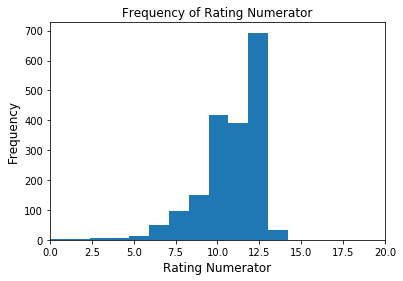

In [65]:
plt.hist(df_data.rating_numerator,bins=1500)
plt.title('Frequency of Rating Numerator')
#We are able to set x-axis limits by using resutls from value_counts() method 
plt.xlim(0,20)
plt.xlabel('Rating Numerator', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()


**From the above chart, it looks like the highest frequency rating are from 7 - 14**

**What is the most popular dog type?**

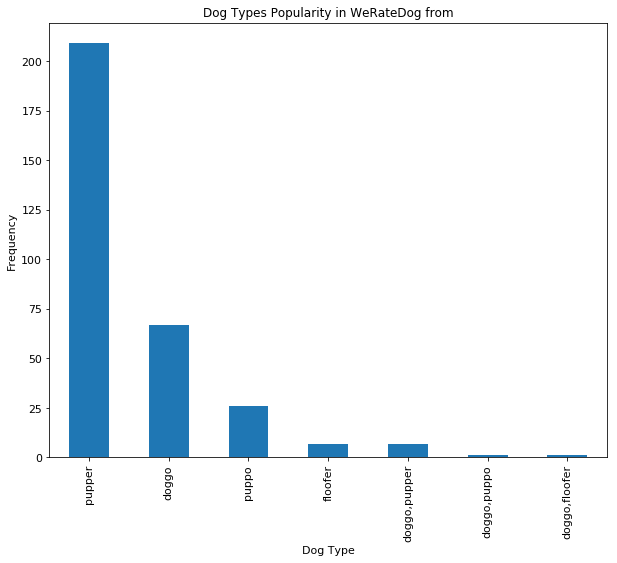

In [66]:
temp_df = df_data.dog_type.value_counts()
temp_df.iloc[1:].plot(kind='bar', title='Dog Types Popularity in WeRateDog from', fontsize=11,figsize=(10,8))
plt.xlabel('Dog Type',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
plt.show()


**The above bar chart shows that pupper is the most popular type, followed by doggo.**

Is there a correlation between retweet count and favorite count?

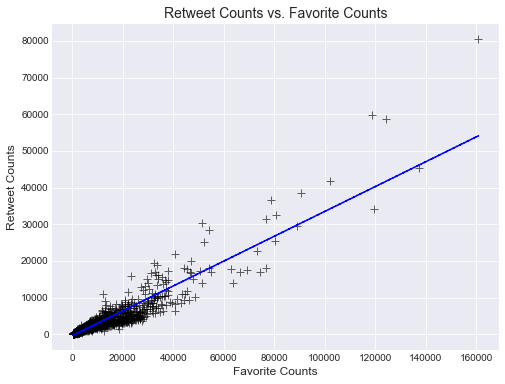

Correlation: 0.93


In [67]:
plt.style.use('seaborn-darkgrid')

x = df_data['favorite_count']
y = df_data['retweet_count']

df_data.plot.scatter('favorite_count','retweet_count', figsize=(8,6), marker='+',c="black",s=50,alpha=0.6,linewidth=1)

z = np.polyfit(x, y,1)
p = np.poly1d(z)

plb.plot(x, p(x), 'b--')


plt.title("Retweet Counts vs. Favorite Counts", fontsize=14)
plt.xlabel("Favorite Counts", fontsize=12)
plt.ylabel("Retweet Counts", fontsize=12)

correlation_r = np.around(x.corr(y), decimals=2)

plt.show()
print("Correlation: " + str(correlation_r))



**There is a strong positive relationship between retweets and favorites**

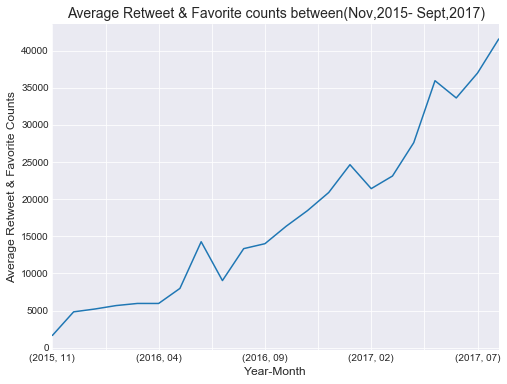

In [68]:
#Since we have a strong relationship between retweets and favorite counts, we are going to sum values for each tweets
#We are going to do this step to verify the retweets/favorites behaviour during time
df_data['sum_retweet_fav'] = pd.Series(list(range(len(df_data))))

for idx, row in df_data.iterrows():
    df_data.loc[idx,'sum_retweet_fav'] = row.retweet_count + row.favorite_count

    
temp_df = df_data.groupby([ 'year','month']).sum_retweet_fav.mean()
temp_df.plot(kind='line',figsize=(8,6))
plt.title("Average Retweet & Favorite counts between(Nov,2015- Sept,2017)", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Average Retweet & Favorite Counts", fontsize=12)
plt.show()


**The line chart displays that retweets and favorite counts of tweets increase by time. This gives us an insight that WeRateDog popularity increase by time.** 